<h1><div align="center">MNIST Database</div></h1>

# <img src="https://imgur.com/LHGvkC1.png"></img>

# 1. Introduction, what is MNIST?

The set of images in the MNIST database consist of digits written by high school students and employees of the United States Census Bureau. The MNIST database contains 60,000 training images and 10,000 testing images. Note this information was taken from wikipedia

# 2. Reading in the date and data exploration

In [2]:
import keras as kr
import numpy as np
import matplotlib.pyplot as plt
import gzip

Using TensorFlow backend.


In [3]:
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content1 = f.read()
    
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/train-images-idx3-ubyte.gz', 'rb') as f:
    file_content2 = f.read()

    
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    label_content1 = f.read()
    
with gzip.open('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/train-labels-idx1-ubyte.gz', 'rb') as f:
    label_content2 = f.read()


Magic number is outputted

In [4]:
int.from_bytes(file_content1[0:4], byteorder='big')

2051

The number of images is outputted

In [5]:
int.from_bytes(file_content1[5:8], byteorder='big')

10000

testing the data so we know what to expect

In [6]:
row = int.from_bytes(file_content1[8:12], byteorder='big')
col = int.from_bytes(file_content1[12:16], byteorder='big')
tot = row*col

print("Rows: ", row,"\nColumns: ", col,"\nTotal: ", tot)

Rows:  28 
Columns:  28 
Total:  784


Output a plot of the image using matplotlib

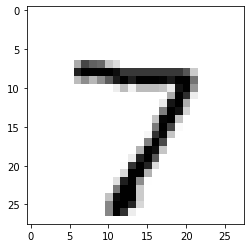

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

image = ~np.array(list(file_content1[16:800])).reshape(28,28).astype(np.uint8)

plt.imshow(image, cmap='gray')

In [8]:
import cv2

cv2.imwrite('test.png', image)

True

So what we have seen above is that the data is correct so now we can proceed

We will now discuss the code to save the images properly so we can train our model


# Doing some exploration

The biggest problem with the current dataset is that it's in a very unfriendly format.
I will explore how to convert to CSV and I will explore the CSV files below

## Exploration of the CSV files

In [9]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')



In [10]:
train = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/mnist_train.csv")
test = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/mnist_test.csv")

display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


None

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### This figure shows the distribution of the numbers across the training dataset

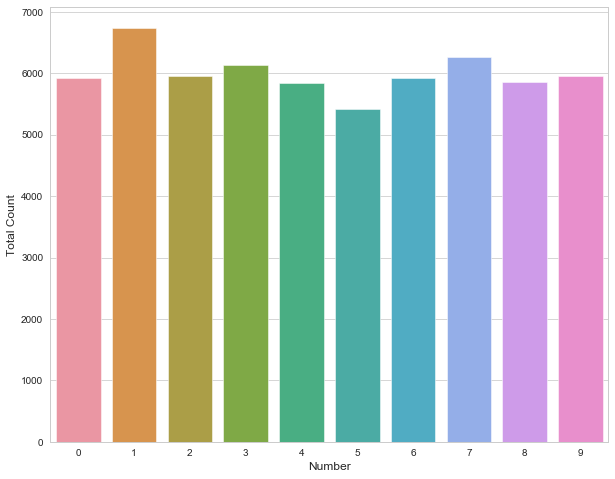

In [11]:
sns.countplot(x = "label", data = train)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel("Number")
plt.ylabel("Total Count")
plt.show()

[1]. http://yann.lecun.com/exdb/mnist/